In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Interpolacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,5,10
1,10,15
2,15,25


In [4]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[ 5. 10. 15.] [10. 15. 25.]


In [5]:
X = np.array([1,2,3,4,5])
Y = np.array([-3.4,-5.6,0,3,3.5])

In [6]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [7]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [8]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

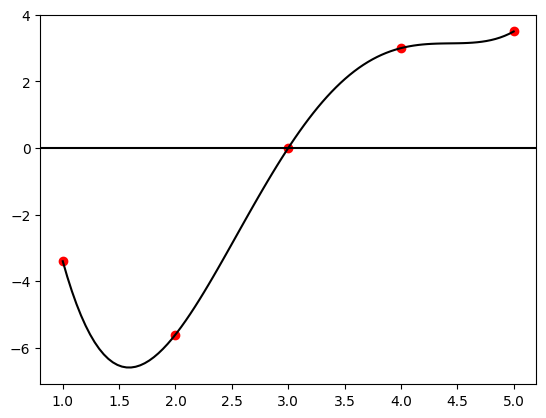

In [9]:
plt.scatter(X,Y,marker='o',color='r')
plt.axhline(0,color='k')
plt.plot(x,y,color='k')

In [10]:
x = sym.Symbol('x',real=True)
x

x

In [11]:
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

0.4375*x**4 - 6.10833333333333*x**3 + 29.6125*x**2 - 54.8416666666667*x + 27.5

In [12]:
func = sym.lambdify([x],f,'numpy')

In [13]:
func(2.5)

-2.878906250000014

In [14]:
x = np.linspace(X[0],X[-1],100)
y = np.interp(x,X,Y)

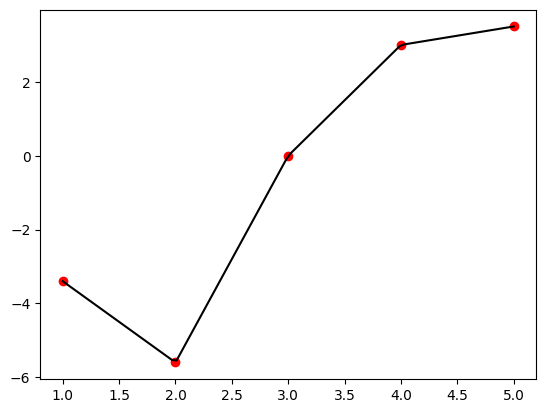

In [15]:
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')

In [16]:
def GetNewtonRaphson(f, df, xn, itmax=100, precision=1e-5):

    error = 1
    it = 0

    while error > precision and it <= itmax:

        try:

            xn1 = xn - f(xn) / df(f, xn)

            error = np.abs(f(xn) / df(f, xn))

            #print(error)

        except ZeroDivisionError:

            print('Division por cero')

        it += 1
        xn = xn1

    if it == itmax:
        False
    else:
        return xn

In [17]:
def Derivative(f, x, h=1e-4):
    return (f(x + h) - f(x - h)) / (2 * h)


In [18]:
def GetAllRoots(x, tolerancia=8):

    Roots = np.array([])

    for i in x:

        root = GetNewtonRaphson(func, Derivative, i)

        if root != False:

            croot = np.round(root, tolerancia)

            if croot not in Roots:
                Roots = np.append(Roots, croot)

    Roots.sort()

    return Roots

In [20]:
x = np.linspace(1, 10, 100)
Roots = GetAllRoots(x)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 100